In [1]:
from moddipic.core.data import PDBPathRep

from prody import fetchPDB, parsePDB

path1 = "/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb"
path2 = "/home/arazthexd/projects/002_sqm/tests/modules/rdkit/files/rec.pdb"
path3 = "/home/arazthexd/projects/002_sqm/data/tmp/protein_clean.pdb"

In [4]:
fetchPDB("6in7", compressed=False, folder="out")

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 6in7 downloaded (out/6in7.pdb)
@> PDB download via FTP completed (1 downloaded, 0 failed).


'out/6in7.pdb'

In [6]:
atomgroup = parsePDB('out/6in7.pdb')

@> 2354 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [9]:
protein = atomgroup.select("protein")
protein

<Selection: 'protein' from 6in7 (2018 atoms)>

In [12]:
addMissingAtoms

NameError: name 'addMissingAtoms' is not defined

In [10]:
ligand = atomgroup.select("ligand")
ligand

SelectionError: An invalid selection string is encountered:
'ligand'
 ^ is not a valid selection string

In [1]:
from moddipic.core.pipeline import Pipeline
from moddipic.core.data import PDBPathRep, SMILESRep, Ligand, Protein
from moddipic.modules.mopac import (
    MOPACInputMolRep, MOPACProteinSinglePointCalculator
)
from moddipic.modules.rdkit import RDKitMolRep

from rdkit import Chem

path1 = "/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb"
path2 = "/home/arazthexd/projects/002_sqm/tests/modules/rdkit/files/rec.pdb"
path3 = "/home/arazthexd/projects/002_sqm/data/tmp/protein_clean.pdb"

In [ ]:
pdb_rep = PDBPathRep(path1)

class MyPipeline(Pipeline):
    name = "my_pipeline"
    def build(self):
        self.add_block()

In [9]:
pdb_rep = PDBPathRep(path1)
mopac_rep = MOPACInputMolRep.from_PDBPathRep(pdb_rep)

In [10]:
mopac_rep.charge

-1

In [4]:
mol = RDKitMolRep.from_PDBPathRep(pdb_rep).data

In [5]:
Chem.GetFormalCharge(mol)

-1

In [23]:
q = Chem.MolFromSmarts("[$(O-C(=O)-C)]")

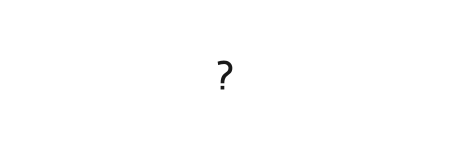

In [24]:
q

In [25]:
list(mol.GetSubstructMatches(q))

[]

In [12]:
pdb_rep = PDBPathRep(path1)
for atom in RDKitMolRep.from_PDBPathRep(pdb_rep).data.GetAtoms():
    atom: Chem.Atom
    c = atom.GetFormalCharge()
    if c != 0:
        print(atom.GetSymbol(), c)


N 1
N 1
N 1
N 1
O -1
N 1
N 1
O -1
N 1
O -1
O -1
O -1
N 1
O -1
N 1
N 1
O -1
O -1
N 1
O -1
O -1
N 1
O -1
O -1
O -1
O -1
O -1
N 1
N 1
O -1
O -1
O -1
N 1
N 1
O -1
N 1
O -1
N 1
N 1
O -1
N 1
N 1
O -1
N 1
N 1
N 1
N 1
O -1
O -1
N 1
N 1
O -1
O -1
O -1
O -1
O -1
N 1
N 1
N 1
N 1
O -1
O -1
O -1
N 1
N 1
N 1
O -1
O -1
N 1
O -1
O -1
N 1
O -1
O -1
N 1
O -1
N 1
O -1
N 1
N 1
N 1
N 1
O -1
O -1
O -1


In [15]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(RDKitMolRep.from_PDBPathRep(pdb_rep).data)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.